# Lecture 5: Recap + Time Series

Plan for the day:

- *Recap*: time to practice our knowledge of what has been covered in the four chapters so far.
    
    - Built-in Python
    - Pandas, Numpy, and Statsmodels.

- On the way, we will introduce commands to create Time Series models in Python.

- Finally, we will introduce Panel Data.

Sources:
- Brownlees, C., & Engle, R. F. (2017). SRISK: A conditional capital shortfall measure of systemic risk. The Review of Financial Studies, 30(1), 48-79.

- Peixeiro, M. (2022). Time series forecasting in python. Simon and Schuster.


The following activities will use datasets on the Systemic Risk of four major Global Financial Firms, provided by the Volatility Lab of NYU Stern.

The Systemic Risk Analysis presents a variety of risk measures for major Global Financial Firms. These measures reveal several dimensions of risk. Historical estimates of each of these risk measures can be plotted to see the changing performance of individual firms.

A financial firm will be unable to function when the value of its equity falls to a sufficiently small fraction of its outstanding liabilities. In good times, such a firm will likely be acquired, may be able to raise new capital or may face an orderly bankruptcy. If this capital shortage occurs at a time when the financial sector is already financially constrained, then the government faces the question of whether to rescue the firm with taxpayer money as other avenues are no longer available. In the theoretical analysis of Acharya, Pederson, Phillipon and Richardson (2010), such a capital shortage is damaging to the real economy as the failure of this firm will have repercussions throughout the financial and real sectors. Consequently a firm is systemically risky if it is likely to face a capital shortage just when the financial sector itself is weak.

V-Lab calculates the expected capital shortage faced by a firm in a potential future financial crisis. Conceptually this calculation is like the stress tests that are regularly applied to financial firms, however here it is done with only publicly available information and is quick and inexpensive to compute.

This calculation takes two steps. First it estimates the expected fractional loss of the firm equity in a crisis when the aggregate market declines significantly in a six-month period. This is called Long-Run Marginal Expected Shortfall or LRMES. The measure incorporates the volatility of the firm and its correlation with the market, as well as its performance in extremes. These are estimated using asymmetric volatility, correlation and copula methods similar to those in other sections of V-Lab. Secondly, equity losses expected in a crisis are combined with current equity market value and outstanding measures of debt to determine how much capital would be needed in such a crisis.

The Systemic Risk Contribution, SRISK%, is the percentage of financial sector capital shortfall that would be experienced by this firm in the event of a crisis. Firms with a high percentage of capital shortfall in a crisis are not only the biggest losers in a crisis but also are the firms that create or extend the crisis. This SRISK% is the NYU Stern Systemic Risk Ranking of the US Financial sector. Some of the firms on this list are already under government protection. Their risk status is a reflection of the costs to the system if the government guarantees were suddenly withdrawn.

We define:
- SRISK: A measure the systemic risk contribution of a financial firm. SRISK measures the capital shortfall of a firm conditional on a severe market decline, and is a function of its size, leverage and risk. Moreover, aggregate SRISK provides early warning signals of distress in indicators of real activity.
SRISK is a function of the size of the firm, its degree of leverage, and its expected equity loss conditional on the market decline, which we call Long Run Marginal Expected Shortfall (LRMES). 

One of the lessons learned from the 2007–2009 financial crisis is that undercapitalization of large financial institutions can impose significant negative externalities on the real economy.

#### Disclaimer: The in-class activities today are related to ECON 234's Assignment on Systemic Risk; however, only loosely. They are not meant to answer the assignment questions, but can be used as a jump-start to help you answer your assignment in Python.

## IN-CLASS:

1. Download the four datasets with ending `_US.csv` in the folder. From each dataset, pick only columns date and srisk. Merge all the datasets by date, adding suffixes "_C, ..." to each of the columns (Keep only rows with dates present in all of them). Call the resulting dataframe `SRISK`. Use `head()` to check your results.

In [76]:
# 1. Merge the four datasets by date, keeping only the rows present in all the datasets. Use prefixes C_, ... for the respective columns. Keep only the SRISK (and the date) columns. Call the resulting dataframe `SRISK`.
import pandas as pd
C = pd.read_csv("C_US.csv").loc[:, ["date", "srisk"]].rename({})
BAC = pd.read_csv("BAC_US.csv").loc[:, ["date", "srisk"]]
GS = pd.read_csv("GS_US.csv").loc[:, ["date", "srisk"]]
JPM = pd.read_csv("JPM_US.csv").loc[:, ["date", "srisk"]]
SRISK = pd.merge(C, BAC, on="date", suffixes=("_C", "_BAC"))
SRISK = pd.merge(SRISK, GS, on="date")
SRISK = pd.merge(SRISK, JPM, on="date", suffixes=("_GS", "_JPM"))
SRISK.head()

,date,srisk_C,srisk_BAC,srisk_GS,srisk_JPM
0,2000-01-03,4991.893118,16767.052036,4175.143395,26391.139091
1,2000-01-04,6270.340339,16731.933649,6928.301004,34425.769266
2,2000-01-05,3426.344005,12839.786893,4748.582101,23865.499709
3,2000-01-06,3363.191052,10498.007081,4784.159854,24884.657171
4,2000-01-07,1498.369283,12589.489649,4289.646182,23427.929799


## IN-CLASS:


2. Use `pd.to_datetime` to convert your column `date` to a `Datetime` format. Make the dates the indices of your dataframe. Resample your data to weekly. Use Pandas' `resample()` function for that. Search its documentation online (as you may do throughout this course). Use `head()` to check your results.

In [31]:
SRISK["date"] = pd.to_datetime(SRISK["date"])
SRISK.set_index("date", inplace=True)
SRISK = SRISK.resample("W").mean()
SRISK.head()

,srisk_C,srisk_BAC,srisk_GS,srisk_JPM
date,,,,
2000-01-09,3910.027559,13885.253861,4985.166507,26598.999007
2000-01-16,-2557.374971,12789.874186,3958.901579,23823.929381
2000-01-23,-8347.420001,14423.997666,3212.114685,25473.846904
2000-01-30,-7021.788426,14218.108610,3009.175392,21124.204133
2000-02-06,-7058.853574,12511.349111,1742.863946,20610.306043


## IN-CLASS:

3.  Use `pd.plot()` to draw the SRISK of each of the firms:
- As a line plot each
- As a stacked plot.

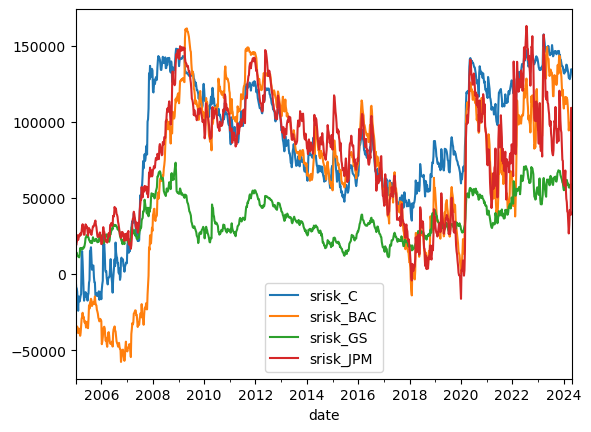

In [38]:
# 3.  Use `pd.plot()` to draw the SRISK of each of the firms:
# - As a line plot each
# - As a stacked plot..
import matplotlib.pyplot as plt
SRISK.plot()
plt.show()

## IN-CLASS:

4.  Convert all of the negative values in the SRISK columns to 0. Plot them as a stacked plot. 

<AxesSubplot: xlabel='date'>

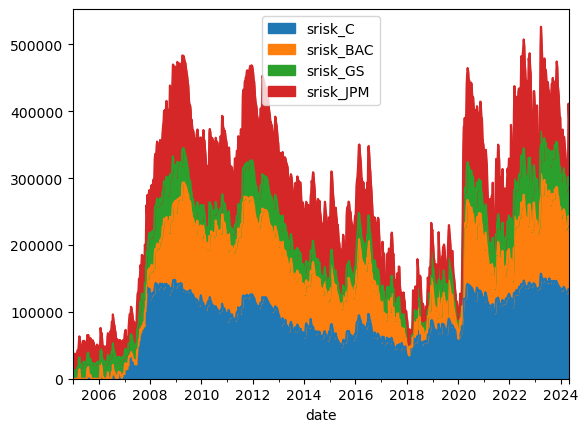

In [43]:
SRISK[SRISK < 0] = 0
SRISK.plot.area()

## 5.1. Time Series Analysis

A time series is a simply of data points ordered in time. Furthermore, the data is often equally spaced in time, meaning that equal intervals separate each data point.

Time Series forecasting is a common problem in Data Science.

Time Series Forecasting is an art in itself. Common considerations when fitting a model to your data series are:

- Autocorrelation: do $y_{t-1}$, ..., $y_{t-p}$ provide information on $y_{t}$? An example:

$$y_t=\mathrm{C}+\phi_1 y_{t-1}+\phi_2 y_{t-2}+\cdots \phi_p y_{t-p}+\epsilon_{\mathrm{t}}$$

- Moving average: can your series be described as a moving average of another series for a given window of length $q$? 

$$y_t=\mu+\epsilon_t+\theta_1 \epsilon_{t-1}+\theta_2 \epsilon_{t-2}+\cdots+\theta_q \epsilon_{t-q}$$

- Stationarity: a stationary time series is one whose statistical properties (mean, variance, autocorrelation) do not change over time. Taking a first-difference, sometimes, can restore stationarity:

$$y_t^{\prime}=y_t-y_{t-1}$$

- Seasonality: does your variable change predictably over time? E.g. sales of turkeys.

Determining the exact order of p and q requires analyzing autocorrelation plots and is beyond the scope of this course. A good reference on Time Series Forecasting is Peixeiro's book, cited above. 

The ARIMA model is one of the most common models for times series. It defines a series as auto-correlated (up to length $p$), with a moving-average component (up to length $q$), and $m$ degrees of integration. After purging out all these effects, the resulting series should behave like a random walk.

An extension of the model is the SARIMAX model, which also allows for Seasonal components and eXogenous regressors in your time series.

Statsmodels provides extensive support for time series analysis. Let's explore an example of fitting an ARIMA model, with $p=1, q=1, m=1$:

                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1358.256
Date:                Tue, 30 Apr 2024   AIC                           2722.512
Time:                        14:04:41   BIC                           2733.702
Sample:                             0   HQIC                          2726.986
                                - 309                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4078      0.072      5.697      0.000       0.268       0.548
ma.L1          0.2042      0.081      2.535      0.011       0.046       0.362
sigma2       395.7236     24.145     16.389      0.0

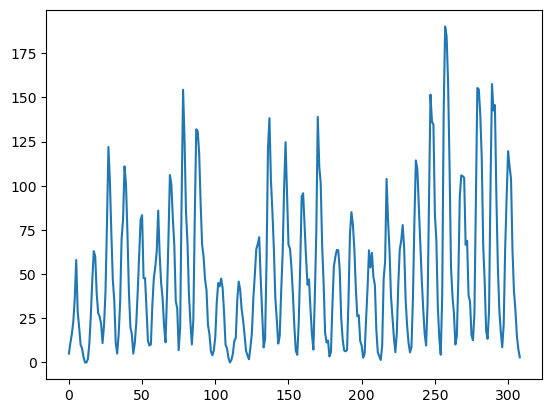

In [44]:
# Load sample time series data
data = sm.datasets.sunspots.load_pandas().data
data.head()
plt.plot(data['SUNACTIVITY'])
# Fit ARIMA model
model = sm.tsa.ARIMA(data['SUNACTIVITY'], order=(1,1,1))
results = model.fit()

# Print model summary
print(results.summary())

The ARIMA model captures the autoregressive and moving average components of the time series, along with differencing to handle non-stationarity.

## IN-CLASS:

5. Create a new column called SRISK_top4 equal to the sum of the 4 SRISK columns. Fit an ARIMA(2,0,0) model to this SRISK series. What do you see? 

In [70]:
# 5. Create a new column called SRISK_top4 equal to the sum of the 4 SRISK columns. Fit an ARIMA(2,0,0) model to this SRISK series. What do you see? 
SRISK["SRISK_top4"] = SRISK.sum(axis=1)
model = sm.tsa.ARIMA(SRISK["SRISK_top4"], order=(3,3,0))
results = model.fit()
results.summary()
# Predict 10 steps ahead:
results.forecast(steps=10)

2024-05-05    6.171490e+06
2024-05-12    6.256924e+06
2024-05-19    6.268356e+06
2024-05-26    5.739758e+06
2024-06-02    5.382613e+06
2024-06-09    4.934167e+06
2024-06-16    4.280184e+06
2024-06-23    3.460707e+06
2024-06-30    2.633537e+06
2024-07-07    1.650631e+06
Freq: W-SUN, Name: predicted_mean, dtype: float64

6. Download from yfinance the stock values for these banks in the last year. Compute the volatility and the Sharpe ratio for each of these 4 banks. How do they compare to the SRISK ordering?

In [29]:
# 6. Download from yfinance the stock values for these banks in the last year. Compute the volatility and the Sharpe ratio for each of these 4 banks. How do they compare to the SRISK ordering?
import yfinance as yf
tickers = ["C", "BAC", "GS", "JPM"]
data = yf.download(tickers, start="2023-04-30", end="2024-04-30")
data = data["Adj Close"]
returns = data.pct_change()
volatility = returns.std()
sharpe = returns.mean() / volatility
print(sharpe)

[*********************100%%**********************]  4 of 4 completed

Ticker
BAC    0.082800
C      0.094612
GS     0.083517
JPM    0.134074
dtype: float64


## 5.2. Automated forecasting libraries

In [67]:
%pip install pmdarima
%pip install prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 656.2/656.2 kB 9.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 22.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.2/301.2 kB 15.6 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.3.1 requires sklearn, which is not installed.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 19.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.4/94.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart t

In [69]:
# Predict using pmdarima
from pmdarima import auto_arima
model = auto_arima(SRISK["SRISK_top4"])
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1009
Model:               SARIMAX(0, 1, 1)   Log Likelihood              -13872.137
Date:                Tue, 30 Apr 2024   AIC                          27748.273
Time:                        14:39:37   BIC                          27758.105
Sample:                    01-02-2005   HQIC                         27752.008
                         - 04-28-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2092      0.020     10.529      0.000       0.170       0.248
sigma2      5.283e+10   6.13e-14   8.62e+23      0.000    5.28e+10    5.28e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              2694.24
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               4.09   Skew:                             1.61
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.5e+38. Standard errors may be unstable.
"""

          ds    y
0 1949-01-01  112
1 1949-02-01  118
2 1949-03-01  132
3 1949-04-01  129
4 1949-05-01  121


14:46:21 - cmdstanpy - INFO - Chain [1] start processing
14:46:22 - cmdstanpy - INFO - Chain [1] done processing


            ds        yhat  yhat_lower  yhat_upper
144 1960-12-31  461.895402  433.001723  488.503585
145 1961-01-31  454.522175  428.701234  484.805997
146 1961-02-28  499.717810  470.951955  529.650579
147 1961-03-31  488.029963  460.463750  516.847088
148 1961-04-30  499.536250  470.760230  528.043969
149 1961-05-31  533.810389  506.228251  561.673908
150 1961-06-30  577.519175  549.800477  606.390310
151 1961-07-31  576.058579  546.943342  605.247352
152 1961-08-31  530.233020  501.661955  559.316186
153 1961-09-30  492.990255  463.980337  521.789769
154 1961-10-31  463.240986  432.084014  492.201244
155 1961-11-30  492.787764  465.661903  522.008044


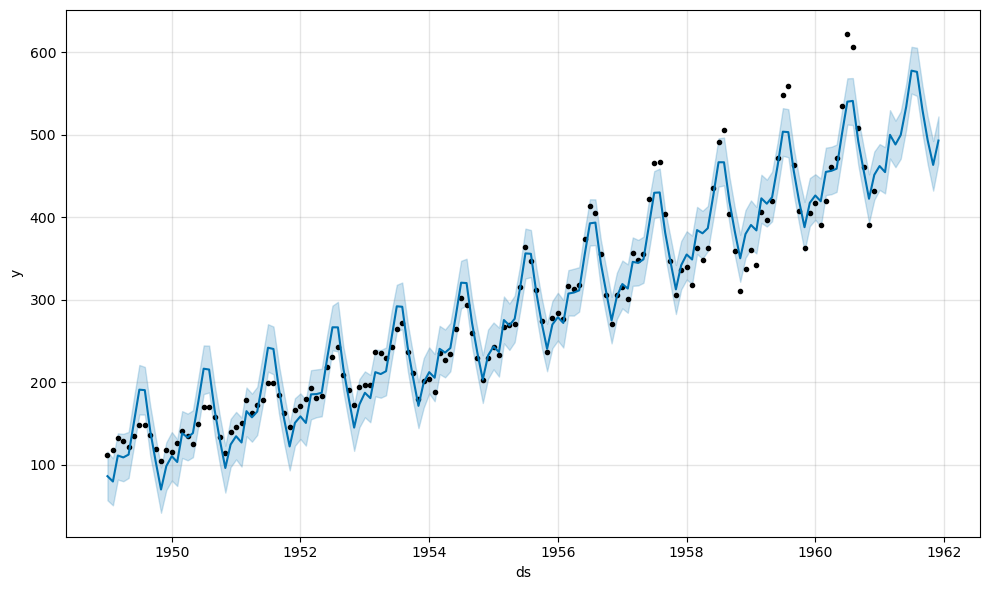

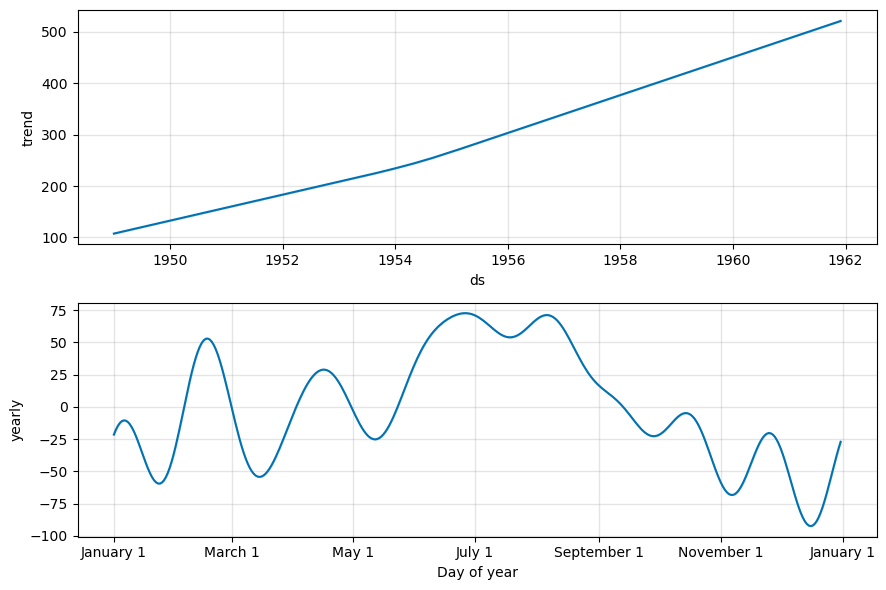

In [75]:
from prophet import Prophet
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url)
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
print(df.head())

model = Prophet()

# Fit the model with your dataframe
model.fit(df)

# Create a dataframe for future predictions extending 12 months beyond the dataset
future = model.make_future_dataframe(periods=12, freq='M')

# Use the model to make predictions
forecast = model.predict(future)

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))
fig1 = model.plot(forecast)

fig2 = model.plot_components(forecast)

